In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier




In [3]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from boruta import BorutaPy

In [5]:
df = pd.read_csv("/content/drive/MyDrive/fertility.csv")

In [6]:
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


**EDA**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Season                                 100 non-null    object
 1   Age                                    100 non-null    int64 
 2   Childish diseases                      100 non-null    object
 3   Accident or serious trauma             100 non-null    object
 4   Surgical intervention                  100 non-null    object
 5   High fevers in the last year           100 non-null    object
 6   Frequency of alcohol consumption       100 non-null    object
 7   Smoking habit                          100 non-null    object
 8   Number of hours spent sitting per day  100 non-null    int64 
 9   Diagnosis                              100 non-null    object
dtypes: int64(2), object(8)
memory usage: 7.9+ KB
None


In [ ]:
#check for missing value
print(df.isnull().sum())

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64


Explore numerical data

In [ ]:
# explore numerical data
print(df.describe())

             Age  Number of hours spent sitting per day
count  99.000000                              99.000000
mean   30.111111                               7.454545
std     2.258268                               3.317464
min    27.000000                               1.000000
25%    28.000000                               5.000000
50%    30.000000                               7.000000
75%    32.000000                               9.000000
max    36.000000                              18.000000


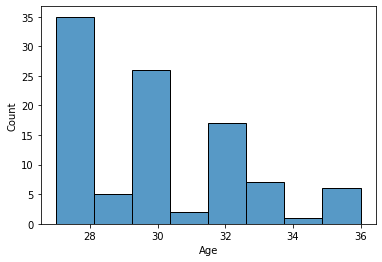

In [ ]:
sns.histplot(data=df, x='Age')

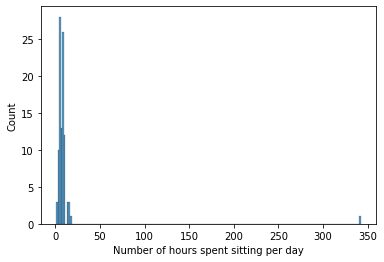

In [ ]:
sns.histplot(data=df, x='Number of hours spent sitting per day')

In [ ]:
# from the plot above we can see there is an outlier in column "Number of hours spent sitting per day"  
# we will remove this because it is just one row

df = df[df['Number of hours spent sitting per day'] != 342]


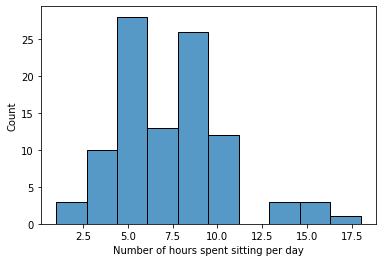

In [ ]:
#Visualizing the column again

sns.histplot(data=df, x='Number of hours spent sitting per day')

Eploring the Categorical variable

In [ ]:
# Create a list of the column names
columns = ['Season','Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Diagnosis']

# count values in each column
for col in columns:
    print(f'Number of unique values in {col}: {df[col].nunique()}')
    print(f'Value counts in {col}:')
    print(df[col].value_counts(), end='\n\n')

Number of unique values in Season: 4
Value counts in Season:
spring    37
fall      31
winter    28
summer     4
Name: Season, dtype: int64

Number of unique values in Childish diseases: 2
Value counts in Childish diseases:
yes    87
no     13
Name: Childish diseases, dtype: int64

Number of unique values in Accident or serious trauma: 2
Value counts in Accident or serious trauma:
no     56
yes    44
Name: Accident or serious trauma, dtype: int64

Number of unique values in Surgical intervention: 2
Value counts in Surgical intervention:
yes    51
no     49
Name: Surgical intervention, dtype: int64

Number of unique values in High fevers in the last year: 3
Value counts in High fevers in the last year:
more than 3 months ago    63
no                        28
less than 3 months ago     9
Name: High fevers in the last year, dtype: int64

Number of unique values in Frequency of alcohol consumption: 5
Value counts in Frequency of alcohol consumption:
hardly ever or never    40
once a week 

Plot all the categorical variable in the dataset

In [ ]:
# Create a list of the column names
columns = ['Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 'Frequency of alcohol consumption', 'Smoking habit', 'Number of hours spent sitting per day', 'Diagnosis']

# Loop through each column name
for col in columns:
    # Create a barplot for the column
    sns.catplot(x=col, kind="count", data=df)
    plt.title(col)
    # Show the plot
    plt.show()

Plot the Dependent variable

<Figure size 30000x30000 with 0 Axes>

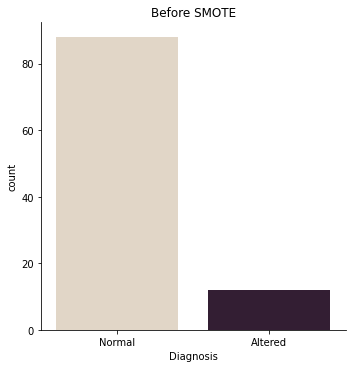

In [7]:
plt.figure(figsize=(10,10),dpi = 3000)
before = sns.catplot(data=df, x="Diagnosis", kind="count", palette="ch:.25")
#before_fig = before.get_figure()
plt.title('Before SMOTE')
before.savefig('before')

Encode the data for chi square

In [ ]:
list(df.columns)

In [ ]:
df.head()

In [9]:
# Define a function that takes a value and returns the encoded value
def encode_variable(value):
  if value == "winter":
    return -1
  elif value == "spring":
    return -0.33
  elif value == "summer":
    return 0.33
  elif value == "fall":
    return 1
  # Repeat the same for variables with yes and No
  elif value == "yes":
    return 1
  elif value == "no":
    return 0
 


In [10]:

 def encode_variable2(value):
  # For the 'Smoking habit' variable:
  if value == "never":
    return -1
  elif value == "occasional":
    return 0
  elif value == "daily":
    return 1

In [11]:

def encode_variable3(value):
  # For the 'High fevers in the last year' variable:
  if value == "less than 3 months ago":
    return -1
  elif value == "more than 3 months ago":
    return 0
  elif value == "no":
    return 1

In [12]:
# Apply the encoding function to each column in the DataFrame
df["Season"] = df["Season"].map(encode_variable)
df["Childish diseases"] = df["Childish diseases"].map(encode_variable)
df["Accident or serious trauma"] = df["Accident or serious trauma"].map(encode_variable)
df["Surgical intervention"] = df["Surgical intervention"].map(encode_variable)
df["Smoking habit"] = df["Smoking habit"].map(encode_variable2)
df["High fevers in the last year"] = df["High fevers in the last year"].map(encode_variable3)


In [13]:
 def encode_variable3(value):
  # For the 'Smoking habit' variable:
  if value == "less than 3 months ago":
    return -1
  elif value == "more than 3 months ago":
    return 0
  elif value == "no":
    return 1

In [14]:
#onehot encode "Frequency of alcohol consumption" because they have more than 3 categories
df = pd.get_dummies(df, columns=['Frequency of alcohol consumption',])

In [15]:
# normalize the numerical variables 'Age' and 'Number of hours spent sitting per day'
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

df['Number of hours spent sitting per day'] = (df['Number of hours spent sitting per day'] - df['Number of hours spent sitting per day'].mean()) / df['Number of hours spent sitting per day'].std()

In [ ]:
df.head()

Calculate chi-square between the categorical variables and output the ones with p-value lesser than 0.05


H0: the two variables are not associated



H1: the two variable are associated



P > 0.05 is the probability that the null hypothesis is true

In [17]:
# Select the categorical features and the target variable
cat_features = ['Season','Childish diseases', 'Accident or serious trauma', 'Surgical intervention', 'High fevers in the last year', 
                'Frequency of alcohol consumption_every day','Frequency of alcohol consumption_once a week',
                'Frequency of alcohol consumption_several times a day','Frequency of alcohol consumption_several times a week', 'Frequency of alcohol consumption_hardly ever or never', 'Smoking habit']
target = 'Diagnosis'

In [18]:
# create a list to store the results
results = []

# iterate over each categorical feature
for col in cat_features:
    # create a contingency table of the counts of each category in the
    # feature and the target variable
    table = pd.crosstab(df[col], df['Diagnosis'])
    # compute the chi-square statistic and p-value
    stat, p, dof, expected = chi2_contingency(table)
    # store the results in a dictionary
    result = {'feature': col, 'chi2': stat, 'p': p}
    # append the result to the list
    results.append(result)

In [19]:
# print the results
for result in results:
    print(f"Feature: {result['feature']}, chi2: {result['chi2']}, p: {result['p']}")

Feature: Season, chi2: 4.161335612948516, p: 0.24456154469665597
Feature: Childish diseases, chi2: 0.0, p: 1.0
Feature: Accident or serious trauma, chi2: 1.2176861963793788, p: 0.2698152153045356
Feature: Surgical intervention, chi2: 0.054718857239865706, p: 0.8150466035263968
Feature: High fevers in the last year, chi2: 1.545214045214045, p: 0.4618075548579861
Feature: Frequency of alcohol consumption_every day, chi2: 0.0, p: 1.0
Feature: Frequency of alcohol consumption_once a week, chi2: 0.26765129224145634, p: 0.6049116744718042
Feature: Frequency of alcohol consumption_several times a day, chi2: 0.0, p: 1.0
Feature: Frequency of alcohol consumption_several times a week, chi2: 0.9158347608640007, p: 0.3385710100148502
Feature: Frequency of alcohol consumption_hardly ever or never, chi2: 2.0872790404040393, p: 0.14853040741591483
Feature: Smoking habit, chi2: 0.21527385657820433, p: 0.8979535587878946


In [17]:
# Split the data into input features and target variable
Y = df['Diagnosis']
X = df.drop(columns = ['Diagnosis'])

Apply Boruta Algorithm

In [18]:
# Define the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [19]:
# Apply the Boruta algorithm to select the important features
boruta = BorutaPy(clf, n_estimators='auto', verbose=2, random_state=0,max_iter=10)
boruta.fit(np.array(X), np.array(Y))

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	0
Tentative: 	2
Rejected: 	11
Iteration: 	9 / 10
Confirmed: 	0
Tentative: 	2
Rejected: 	11


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	0
Tentative: 	1
Rejected: 	11


BorutaPy(estimator=RandomForestClassifier(n_estimators=20,
                                          random_state=RandomState(MT19937) at 0x7F65EEA5E640),
         max_iter=10, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F65EEA5E640, verbose=2)

Balance the otput class

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
# Oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)


In [22]:
y_resampled.value_counts()

Normal     88
Altered    88
Name: Diagnosis, dtype: int64

In [23]:
# Create the Tomek links object
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks()

In [24]:
# Undersample the majority class
X_resampled, y_resampled = tomek.fit_resample(X_resampled, y_resampled)

In [25]:
y_resampled.value_counts()

Altered    88
Normal     87
Name: Diagnosis, dtype: int64

In [26]:
print(len(y_resampled) , len(X_resampled))

175 175


In [ ]:
sns.displot(y_resampled,palette="ch:.25")

In [ ]:
plt.figure(figsize=(10,10),dpi = 3000)
after = sns.catplot(x = y_resampled, data= y_resampled, kind="count", palette="ch:.25")
plt.title('After SMOTE')
before.savefig('after')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.20,random_state=0,stratify=y_resampled)

In [37]:
print("X_train = ",len(X_train), ";", "X_test =", len(X_test), ";", "y_train =",len(y_train),";", "y_test = ", len(y_test))

X_train =  140 ; X_test = 35 ; y_train = 140 ; y_test =  35


**FIT LOGISTIC REGRESSION**

In [43]:
np.random.seed(31415) 
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred = logreg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[16,  2],
       [ 3, 14]])

In [63]:
f1_score(y_test,y_pred, pos_label="Normal")

0.8484848484848485

In [46]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

     Altered       0.84      0.89      0.86        18
      Normal       0.88      0.82      0.85        17

    accuracy                           0.86        35
   macro avg       0.86      0.86      0.86        35
weighted avg       0.86      0.86      0.86        35



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


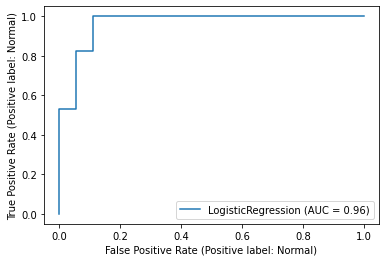

In [47]:
metrics.plot_roc_curve(logreg, X_test, y_test)
plt.show()

**FIT SUPPORT VECTOR MACHINE**

In [48]:
from sklearn import svm
from sklearn import metrics

In [49]:
svm_model = svm.SVC(kernel='linear') # Linear Kernel

In [50]:
np.random.seed(31415) 
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
y_pred_svm = svm_model.predict(X_test)

In [52]:
confusion_matrix(y_test,y_pred_svm)

array([[16,  2],
       [ 2, 15]])

In [62]:
print(classification_report(y_test, svm_model.predict(X_test)))

              precision    recall  f1-score   support

     Altered       0.89      0.89      0.89        18
      Normal       0.88      0.88      0.88        17

    accuracy                           0.89        35
   macro avg       0.89      0.89      0.89        35
weighted avg       0.89      0.89      0.89        35



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


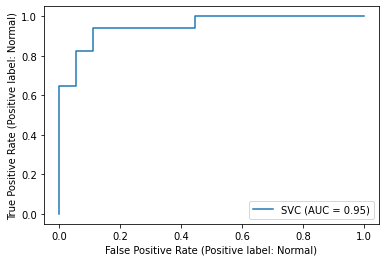

In [55]:
metrics.plot_roc_curve(svm_model, X_test, y_test)
plt.show()

**FITTING NAIVE BAYES MODEL**

In [57]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
np.random.seed(31415) 
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [58]:
# Predicting the Test set results
y_pred_nb = nb_model.predict(X_test)

In [59]:
confusion_matrix(y_test, y_pred_nb)

array([[18,  0],
       [12,  5]])

In [60]:
print(classification_report(y_test, nb_model.predict(X_test)))

              precision    recall  f1-score   support

     Altered       0.60      1.00      0.75        18
      Normal       1.00      0.29      0.45        17

    accuracy                           0.66        35
   macro avg       0.80      0.65      0.60        35
weighted avg       0.79      0.66      0.61        35



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


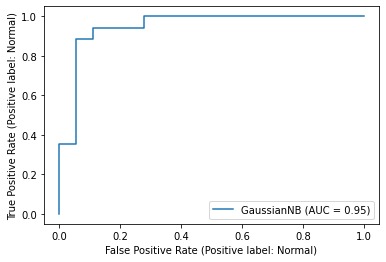

In [61]:
metrics.plot_roc_curve(nb_model, X_test, y_test)
plt.show()